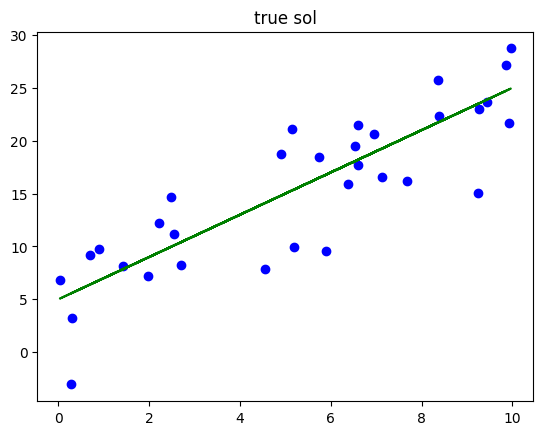

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N_POINTS = 32
x = np.random.rand(N_POINTS) * 10
y_clean = (2 * x) + 5
y = y_clean + (np.random.randn(N_POINTS) * 4)

plt.scatter(x, y, c="blue")
plt.plot(x, y_clean, c="green")
plt.title("true sol");

(32, 2)
[4.89481347 1.96193836]


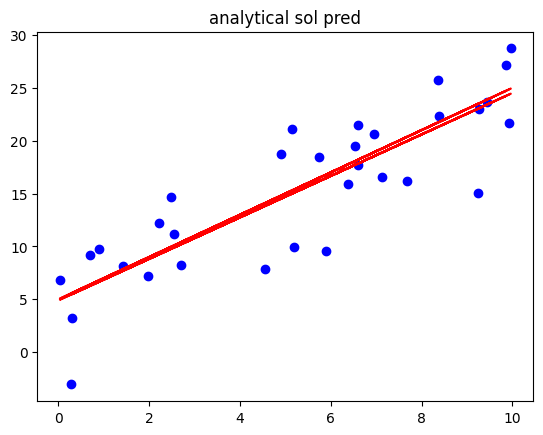

In [2]:
# Analytical solution.
X = np.hstack((np.ones_like(x).reshape(-1, 1), x.reshape(-1, 1)))
print(X.shape)
theta = np.linalg.solve(X.T @ X, X.T @ y)
print(theta)

plt.scatter(x, y, c="blue")
plt.plot(x, y_clean, c="red")
y_pred = X @ theta
plt.plot(x, y_pred, c="red")
plt.title("analytical sol pred");

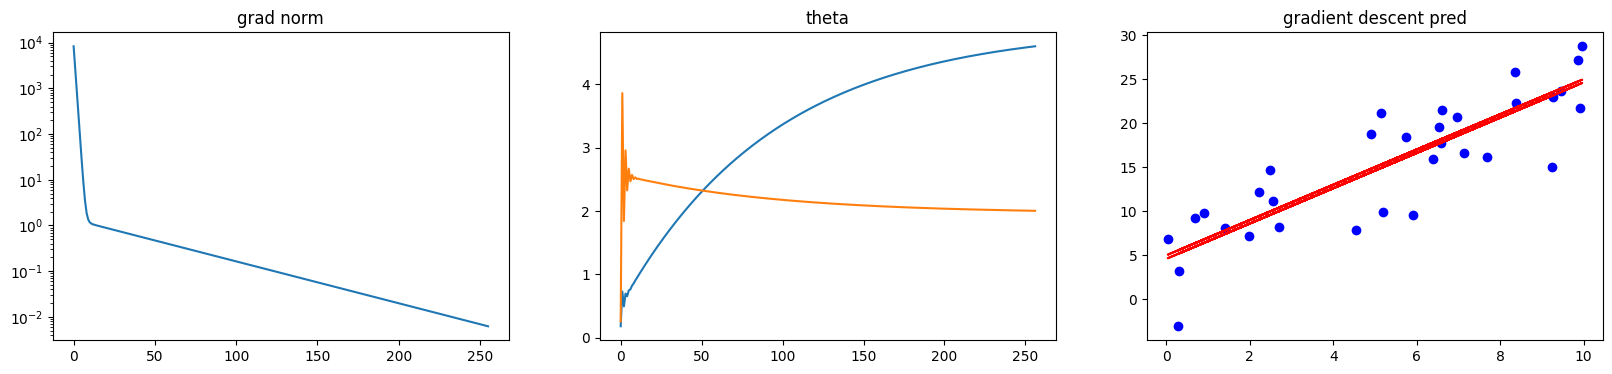

In [3]:
# Gradient descent.
theta = np.random.random(2)
lr = 0.04
grad_norms = []
thetas = [(theta[0], theta[1])]
for i in range(256):
    grad = (((X @ theta) - y)[:, None] * X).mean(axis=0)
    grad_norms.append((grad ** 2).sum())
    theta -= lr * grad
    thetas.append((theta[0], theta[1]))


fig, (grad_ax, theta_ax, pred_ax) = plt.subplots(ncols=3, figsize=(20, 4))

grad_ax.plot(grad_norms)
grad_ax.set_yscale("log")
grad_ax.set_title("grad norm")

theta_ax.plot([t[0] for t in thetas])
theta_ax.plot([t[1] for t in thetas])
theta_ax.set_title("theta")
theta_ax.set_yscale("linear")

pred_ax.scatter(x, y, c="blue")
pred_ax.plot(x, y_clean, c="red")
y_pred = X @ theta
pred_ax.plot(x, y_pred, c="red")
pred_ax.set_title("gradient descent pred");